In [2]:
from skimage import io, exposure, morphology, measure, filters
from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.feature import canny
from skimage.morphology import watershed
import matplotlib.pyplot as plt
import numpy as np

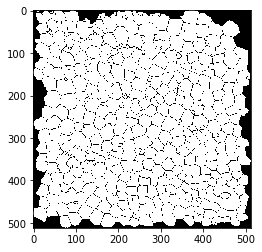

In [4]:
image = io.imread("./images/segmentacion_referencia.tif")
image = image[0]
plt.imshow(image, cmap="gray")
plt.show()

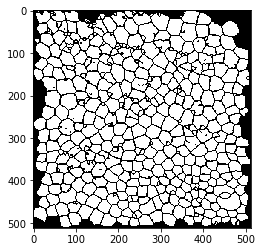

In [6]:
fill = morphology.binary_erosion(image)
plt.imshow(fill, cmap="gray")
plt.show()

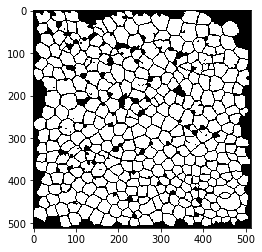

In [9]:
fill = morphology.remove_small_objects(fill,connectivity=8,min_size=100)
plt.imshow(fill, cmap="gray")
plt.show()

In [12]:
label,_ = ndi.label(fill)
regions = measure.regionprops(label)

In [13]:
i = 1
for region in regions:
    if region.filled_area > 1:
        print(i, "Centroid:", region.centroid, "Axis",region.minor_axis_length,";", region.major_axis_length, "Area:", region.filled_area)
        i+=1

1 Centroid: (16.094720496894411, 24.032608695652176) Axis 26.110124755048023 ; 34.24557205794595 Area: 644
2 Centroid: (14.341603053435115, 60.559160305343511) Axis 24.64502031190375 ; 29.68198954092143 Area: 524
3 Centroid: (14.254125412541255, 91.473597359735976) Axis 24.32294832614239 ; 33.43438359463946 Area: 606
4 Centroid: (8.822115384615385, 224.78365384615384) Axis 12.829202469400762 ; 21.166070498098655 Area: 208
5 Centroid: (15.716186252771619, 369.98115299334813) Axis 30.89333238193962 ; 38.64026755264859 Area: 902
6 Centroid: (20.06766917293233, 201.81052631578947) Axis 29.162871151726694 ; 33.946191797289146 Area: 665
7 Centroid: (21.565149136577709, 401.39246467817895) Axis 26.010874166986415 ; 32.827091155086485 Area: 637
8 Centroid: (21.020297699594046, 255.35453315290934) Axis 24.145113912240586 ; 41.656918926259166 Area: 739
9 Centroid: (26.578900709219859, 298.7828014184397) Axis 36.04017540909276 ; 42.62765060353213 Area: 1128
10 Centroid: (32.818696883852695, 179.7

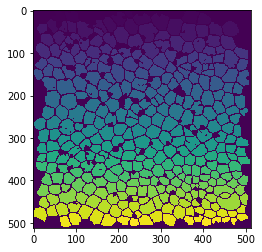

In [14]:
plt.imshow(label)
plt.show()